In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
# import pickle
# from datetime import datetime
# # load a file to a variable
# current_time = datetime.utcnow()
# with open('C:/ntpu_project/dicom_label2_512_512.pickle', 'rb') as file:
#     pickle_dict = pickle.load(file)

# print(datetime.utcnow() - current_time)

In [3]:
import pickle
# load a file to a variable
with open('C:/ntpu_project/dicom_label2_512_512_self_windowing.pickle', 'rb') as file:
    pickle_dict = pickle.load(file)

In [4]:
label0 = pickle_dict.get('label0')
label1 = pickle_dict.get('label1')
label2 = pickle_dict.get('label2', list())

In [5]:
print(f'len label0 = {len(label0)}')
print(f'len label1 = {len(label1)}')
print(f'len label2 = {len(label2)}')

len label0 = 3373
len label1 = 1016
len label2 = 2117


In [6]:
for i, dicom in enumerate(label0):
    if dicom.SOP_Instance_UID == '1.3.6.1.4.1.14519.5.2.1.6279.6001.668870255745145605727167300488':
        print(f'index = {i}')

index = 1599


In [7]:
# 取資料
import random

label0_index_list = random.sample(range(len(label0)),1000)
label1_index_list = random.sample(range(len(label1)),1000)
label2_index_list = random.sample(range(len(label2)),1000)

label0_dicom_list = [v for i, v in enumerate(label0) if i in label0_index_list]
label0_other = [v for i, v in enumerate(label0) if i not in label0_index_list]


label1_dicom_list = [v for i, v in enumerate(label1) if i in label1_index_list]
label1_other = [v for i, v in enumerate(label1) if i not in label1_index_list]
    
# for index in label2_index_list:
#     label2_dicom_list.append(label2[index])
label2_dicom_list = [v for i, v in enumerate(label2) if i in label2_index_list]
label2_other = [v for i, v in enumerate(label2) if i not in label2_index_list]

print(len(label0_dicom_list))
print(len(label1_dicom_list))
print(len(label2_dicom_list))
print('================================')
print(f'len label0_other = {len(label0_other)}')
print(f'len label1_other = {len(label1_other)}')
print(f'len label2_other = {len(label2_other)}')

1000
1000
1000
len label0_other = 2373
len label1_other = 16
len label2_other = 1117


In [8]:
def standardlize(input_image):
    
    image = input_image.astype(np.int32)
    
    max = np.max(image)
    min = np.min(image)

    image = (image - min) / (max - min)
    
    return image

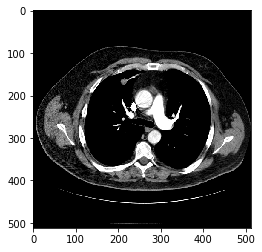

In [9]:
import matplotlib.pyplot as plt
import numpy as np
dicom = label0[1599]
# dicom = label0[1605]
# print(dicom.full_path)
# plt.imshow(dicom.pixel_array, cmap=plt.cm.gray)
# plt.imshow(standardlize(dicom.pixel_array), cmap=plt.cm.gray)
soft_tissue_image = dicom.window_image(50, 350)
# plt.imshow(soft_tissue_image, cmap=plt.cm.gray)
plt.imshow(standardlize(soft_tissue_image), cmap=plt.cm.gray)

In [10]:
# 壓縮圖片至 128x128
# import cv2
# for dicom in label0_dicom_list:
#     dicom.pixel_array = cv2.resize(dicom.pixel_array, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)

# for dicom in label1_dicom_list:
#     dicom.pixel_array = cv2.resize(dicom.pixel_array, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)

# for dicom in label2_dicom_list:
#         dicom.pixel_array = cv2.resize(dicom.pixel_array, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
    
# cv2.resize(dataset.pixel_array, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)

In [11]:
# # 壓縮圖片至 128x128
# import cv2
# x = list()
# y = list()
# all_imgs = list()

# for dicom in label0_dicom_list:
#     image = cv2.resize(standardlize(dicom.window_image(-200, 1400)), dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
#     all_imgs.append(np.expand_dims(image, axis=2))
#     y.append([1])

# for dicom in label1_dicom_list:
#     image = cv2.resize(standardlize(dicom.window_image(-200, 1400)), dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
#     all_imgs.append(np.expand_dims(image, axis=2))
#     y.append([1])

# for dicom in label2_dicom_list:
#     image = cv2.resize(standardlize(dicom.window_image(-200, 1400)), dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
#     all_imgs.append(np.expand_dims(image, axis=2))
#     y.append([0])
    
# y = np.array(y)
# x = np.stack(all_imgs)

In [12]:
# prepair data for CNN 2 label
x = list()
y = list()
all_imgs = list()

for dicom in label0_dicom_list:
    all_imgs.append(np.expand_dims(standardlize(dicom.window_image(-200, 1400)), axis=2))
    y.append([1,0])

# for dicom in label1_dicom_list:
#     all_imgs.append(np.expand_dims(standardlize(dicom.window_image(-200, 1400)), axis=2))
#     y.append([0,1,0])

for dicom in label2_dicom_list:
    all_imgs.append(np.expand_dims(standardlize(dicom.window_image(-200, 1400)), axis=2))
    y.append([0,1])
    
y = np.array(y)
x = np.stack(all_imgs)

# prepair data for CNN - 3 label
# x = list()
# y = list()
# all_imgs = list()

# for dicom in label0_dicom_list:
#     all_imgs.append(np.expand_dims(standardlize(dicom.window_image(-200, 1400)), axis=2))
#     y.append([2])

# for dicom in label1_dicom_list:
#     all_imgs.append(np.expand_dims(standardlize(dicom.window_image(-200, 1400)), axis=2))
#     y.append([1])

# for dicom in label1_dicom_list:
#     all_imgs.append(np.expand_dims(standardlize(dicom.window_image(-200, 1400)), axis=2))
#     y.append([0])
    
# y = np.array(y)
# x = np.stack(all_imgs)

In [13]:
# prepair data for CNN 2 label
# x_other = list()
# y_other = list()

# for dicom in label0_other:
#     x_other.append(np.expand_dims(standardlize(dicom.window_image(-200, 1400)), axis=2))
#     y_other.append([1])

# for dicom in label1_other:
#     x_other.append(np.expand_dims(standardlize(dicom.window_image(-200, 1400)), axis=2))
#     y_other.append([1])

# for dicom in label2_other:
#     x_other.append(np.expand_dims(standardlize(dicom.window_image(-200, 1400)), axis=2))
#     y_other.append([0])
    
# y_other = np.array(y_other)
# x_other = np.stack(x_other)
# y_other_onehot = to_categorical(y_other)

In [14]:
print(type(x))
print(np.shape(x))
print(type(y))
print(np.shape(y))
print(np.sum(y))

<class 'numpy.ndarray'>
(2000, 512, 512, 1)
<class 'numpy.ndarray'>
(2000, 2)
2000


In [15]:
# print(type(x_other))
# print(np.shape(x_other))
# print(type(y_other))
# print(np.shape(y_other))
# print(np.sum(y_other))

In [28]:
import gc
gc.collect()

20

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2100, shuffle=True, stratify=y)
# y_train_onehot = to_categorical(y_train)
# y_test_onehot = to_categorical(y_test)

In [18]:
print(np.shape(x_train))
print(np.shape(y_train))
# print(np.shape(y_train_onehot))
print(np.sum(y_train))

print(np.shape(x_test))
print(np.shape(y_test))
# print(np.shape(y_test_onehot))
print(np.sum(y_test))

(1600, 512, 512, 1)
(1600, 2)
1600
(400, 512, 512, 1)
(400, 2)
400


In [24]:
from utils.keras import CnnModel, show_train_history, show_train_history2
# from utils.focal_loss import multi_category_focal_loss2

In [25]:
cnn_model = CnnModel(x_train, y_train, x_test, y_test)
# cnn_model = CnnModel(x_train, y_train_onehot, x_test, y_test_onehot, [multi_category_focal_loss2()])

In [42]:
# prepairing model config
config_list = list()
# append 多個模型: conv2D_config_list + dense_config_list
config_list.append({
        'conv2D_config_list': [
            # 情境一
#             {'filters': 64, 'kernel_size': (4, 4), 'pool_size': (2, 2), 'input_shape': (128, 128, 1), 'strides': 2},
#             {'filters': 64, 'kernel_size': (4, 4), 'pool_size': (2, 2), 'input_shape': (128, 128, 1), 'strides': 2},
#             {'filters': 64, 'kernel_size': (4, 4), 'pool_size': (2, 2), 'input_shape': (512, 512, 1), 'strides': 2},
#             {'filters': 64, 'kernel_size': (4, 4), 'pool_size': (2, 2), 'input_shape': (512, 512, 1), 'strides': 2},
            # 情境四
            # 22
#             {'filters': 64, 'kernel_size': (4, 4), 'pool_size': (2, 2), 'input_shape': (512, 512, 1), 'strides': 2},
#             {'filters': 64, 'kernel_size': (4, 4), 'pool_size': (2, 2), 'input_shape': (512, 512, 1), 'strides': 2},
            # 33
            {'filters': 128, 'kernel_size': (2, 2), 'pool_size': (2, 2), 'input_shape': (512, 512, 1), 'strides': 2},
            {'filters': 128, 'kernel_size': (2, 2), 'pool_size': (2, 2), 'input_shape': (512, 512, 1), 'strides': 2},
            {'filters': 128, 'kernel_size': (4, 4), 'pool_size': (2, 2), 'input_shape': (512, 512, 1), 'strides': 2},
            {'filters': 128, 'kernel_size': (4, 4), 'pool_size': (2, 2), 'input_shape': (512, 512, 1), 'strides': 2},

            # 44
#             {'filters': 128, 'kernel_size': (2, 2), 'pool_size': (2, 2), 'input_shape': (512, 512, 1), 'strides': 2},
#             {'filters': 128, 'kernel_size': (2, 2), 'pool_size': (2, 2), 'input_shape': (512, 512, 1), 'strides': 2},
        ],
        'dense_config_list': [
            {'unit': 512},
        ]
    })

train_history_list = list()

In [ ]:
# 每個模型跑 t 次
t = 1

for i, config in enumerate(config_list):
    print(f'===processing model {(i+1)}===')
    current_time = 0
    while current_time < t:
        gc.collect()
        current_time = current_time + 1
        print(f'===processing current_time {(current_time)} model===')
        train_history_list.append(cnn_model.run(i, 20, 15, config['conv2D_config_list'], config['dense_config_list'], 0.25, 0.25, 1))
    print(f'==============================')

===processing model 1===
===processing current_time 1 model===
Train on 1280 samples, validate on 320 samples
Epoch 1/15
1280/1280 [==============================] - 5s 4ms/sample - loss: 0.6955 - accuracy: 0.4992 - val_loss: 0.6930 - val_accuracy: 0.5063
Epoch 2/15
1280/1280 [==============================] - 4s 3ms/sample - loss: 0.6939 - accuracy: 0.4836 - val_loss: 0.6888 - val_accuracy: 0.5656
Epoch 3/15
1280/1280 [==============================] - 4s 3ms/sample - loss: 0.6719 - accuracy: 0.5977 - val_loss: 0.6371 - val_accuracy: 0.6625
Epoch 4/15
1280/1280 [==============================] - 4s 3ms/sample - loss: 0.6430 - accuracy: 0.6328 - val_loss: 0.6193 - val_accuracy: 0.6406
Epoch 5/15
1280/1280 [==============================] - 4s 3ms/sample - loss: 0.6178 - accuracy: 0.6609 - val_loss: 0.6293 - val_accuracy: 0.6531
Epoch 6/15
1280/1280 [==============================] - 5s 4ms/sample - loss: 0.5909 - accuracy: 0.6930 - val_loss: 0.6054 - val_accuracy: 0.6781
Epoch 7/15
128

In [33]:
print(len(train_history_list))
print([train_history['test_accuracy'] for train_history in train_history_list])
# [0.755, 0.745, 0.7625, 0.7825, 0.74]

30
[0.74, 0.7775, 0.7225, 0.755, 0.76, 0.735, 0.7725, 0.7525, 0.7625, 0.74, 0.71, 0.7575, 0.7325, 0.7225, 0.7325, 0.755, 0.7525, 0.7425, 0.76, 0.7925, 0.7475, 0.7525, 0.755, 0.7475, 0.74, 0.7175, 0.775, 0.7775, 0.745, 0.765]


In [31]:
acurracy_list_1 = list()
acurracy_list_2 = list()
acurracy_list_3 = list()
for train_history in train_history_list:
    acurracy_list_1.append(train_history['confusion_matrix'][0][0]/np.sum(train_history['confusion_matrix'][0]))
    acurracy_list_2.append(train_history['confusion_matrix'][1][1]/np.sum(train_history['confusion_matrix'][1]))
    acurracy_list_3.append(train_history['confusion_matrix'][2][2]/np.sum(train_history['confusion_matrix'][2]))
#     print(np.sum(train_history['confusion_matrix'][0]))
    

IndexError: index 2 is out of bounds for axis 0 with size 2

In [79]:
specificity_list_1 = list()
specificity_list_2 = list()
specificity_list_3 = list()

for train_history in train_history_list:
    c = train_history['confusion_matrix']
    n11 = c[0,0]
    n12 = c[0,1]
    n13 = c[0,2]

    n21 = c[1,0]
    n22 = c[1,1]
    n23 = c[1,2]

    n31 = c[2,0]
    n32 = c[2,1]
    n33 = c[2,2]
    
    specificity_list_1.append( (n22+n23+n32+n33) / (n22+n23+n32+n33+n21+n31))
    specificity_list_2.append( (n11+n13+n31+n33) / (n11+n13+n31+n33+n12+n32))
    specificity_list_3.append( (n11+n12+n21+n22) / (n11+n12+n21+n22+n13+n23))


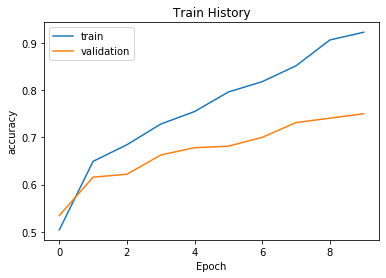

In [66]:
for train_history in train_history_list:
    show_train_history(train_history['train_history'])

In [32]:
import pickle
import copy
import os

scenario_name = 'scenario_5'
model_name = 'big_non_nodule'

if not os.path.exists(scenario_name):
    os.makedirs(scenario_name)

if not os.path.exists(f'{scenario_name}/{model_name}'):
    os.makedirs(f'{scenario_name}/{model_name}')
    
output = list()
for i, train_history in enumerate(train_history_list):
    model_name_i = f'model_{i+1}.h5'
    train_history['model'].save(f"{scenario_name}/{model_name}/{model_name_i}")
    data = {
        'model_name': model_name_i,
        'train_history': {
            'accuracy': train_history['train_history'].history['accuracy'], 
            'loss': train_history['train_history'].history['loss'], 
            'val_accuracy': train_history['train_history'].history['val_accuracy'], 
            'val_loss': train_history['train_history'].history['val_loss'], 
        },
        'test_loss': train_history['test_loss'], 
        'test_accuracy': train_history['test_accuracy'],
        'sensitivity': train_history['sensitivity'],
        'specificity': train_history['specificity'],
        'confusion_matrix': train_history['confusion_matrix']
    }
    output.append(data)
file = open(f"{scenario_name}/{model_name}/model_detail.pickle", 'wb')
pickle.dump(output, file)
file.close()

In [52]:
def show_train_history2(train_history, type='accuracy'):
    if type == 'accuracy':
        plt.plot(train_history['accuracy'])
        plt.plot(train_history['val_accuracy'])
        plt.title('Train History')
        plt.xlabel('Epoch')
        plt.ylabel('accuracy')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()
    else:
        plt.plot(train_history['loss'])
        plt.plot(train_history['val_loss'])
        plt.title('Train History')
        plt.xlabel('Epoch')
        plt.ylabel('loss')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()

In [73]:
c = [
 [101,  32,  67],
 [ 49,  51, 100],
 [ 43,  28, 129]
]

c = np.array(c)

n11 = c[0,0]
n12 = c[0,1]
n13 = c[0,2]

n21 = c[1,0]
n22 = c[1,1]
n23 = c[1,2]

n31 = c[2,0]
n32 = c[2,1]
n33 = c[2,2]


sensitivity = [
        c[0, 0] / (c[0, 0] + c[0, 1] + c[0, 2]),
        c[1, 1] / (c[1, 0] + c[1, 1] + c[1, 2]),
        c[2, 2] / (c[2, 1] + c[2, 1] + c[2, 2]),
]
specificity = [
        (n22+n23+n32+n33) / (n22+n23+n32+n33+n21+n31),
        (n11+n13+n31+n33) / (n11+n13+n31+n33+n12+n32) ,
        (n11+n12+n21+n22) / (n11+n12+n21+n22+n13+n23),
]

print(sensitivity)
print(specificity)

[0.505, 0.255, 0.6972972972972973]
[0.77, 0.85, 0.5825]


In [72]:
c = [
 [101,  32,  67],
 [ 49,  51, 100],
 [ 43,  28, 129]
]

c = np.array(c)

n11 = c[0,0]
n12 = c[0,1]
n13 = c[0,2]

n21 = c[1,0]
n22 = c[1,1]
n23 = c[1,2]

n31 = c[2,0]
n32 = c[2,1]
n33 = c[2,2]

sensitivity = [
        c[0, 0] / (c[0, 0] + c[0, 1] + c[0, 2]),
        c[1, 1] / (c[1, 0] + c[1, 1] + c[1, 2]),
        c[2, 2] / (c[2, 1] + c[2, 1] + c[2, 2]),
]
specificity = [
        (n22+n33) / (n21+n31+n22+n33),
        (n11+n33) / (n12+n32+n11+n33) ,
        (n11+n22) / (n13+n23+n11+n22),
]

print(sensitivity)
print(specificity)

[0.505, 0.255, 0.6972972972972973]
[0.6617647058823529, 0.7931034482758621, 0.47648902821316613]


In [63]:
import pickle
# load a file to a variable
with open('scenario_3/focal_loss/model_detail.pickle', 'rb') as file:
    pickle_dict = pickle.load(file)

print([train_history['test_accuracy'] for train_history in pickle_dict])
    
# for train_history in pickle_dict:
#     show_train_history2(train_history['train_history'])

[0.67, 0.6925, 0.7075, 0.6925, 0.6675, 0.7025, 0.6925, 0.69, 0.6925, 0.6875, 0.6675, 0.6675, 0.6775, 0.705, 0.6375, 0.7, 0.6825, 0.665, 0.705, 0.69, 0.685, 0.4875, 0.67, 0.6825, 0.4875, 0.4875, 0.6825, 0.705, 0.6925, 0.685]


In [47]:
print(output[0])

{'model_name': 'model_1.h5', 'train_history': <tensorflow.python.keras.callbacks.History object at 0x0000028886756648>, 'test_loss': 1.1123533678054809, 'test_accuracy': 0.715, 'sensitivity': 0.6829268292682927, 'specificity': 0.7487179487179487}


In [21]:
cnn_model2 = CnnModel(x_train, y_train_onehot, x_test, y_test_onehot, [multi_category_focal_loss2()])

train_history_list2 = list()

In [22]:
training_times = 10
current_time = 0
while current_time < training_times:
    current_time = current_time + 1
    print(f'===processingcurrent_timemodel {(current_time)}===')
    for i, config in enumerate(config_list):
        print(f'===processing model {(i+1)}===')
        train_history_list2.append(cnn_model2.run(i, 20, 10, config['conv2D_config_list'], config['dense_config_list'], 0.25, 0.25, 1))
        print(f'==============================')

===processingcurrent_timemodel 1===
===processing model 1===
Train on 1280 samples, validate on 320 samples
Epoch 1/10
1280/1280 [==============================] - 7s 5ms/sample - loss: 0.1368 - accuracy: 0.5734 - val_loss: 0.0770 - val_accuracy: 0.6531
Epoch 2/10
1280/1280 [==============================] - 4s 3ms/sample - loss: 0.0776 - accuracy: 0.6781 - val_loss: 0.0757 - val_accuracy: 0.6844
Epoch 3/10
1280/1280 [==============================] - 3s 3ms/sample - loss: 0.0746 - accuracy: 0.7023 - val_loss: 0.0760 - val_accuracy: 0.7000
Epoch 4/10
1280/1280 [==============================] - 3s 3ms/sample - loss: 0.0704 - accuracy: 0.7180 - val_loss: 0.0736 - val_accuracy: 0.7125
Epoch 5/10
1280/1280 [==============================] - 3s 3ms/sample - loss: 0.0663 - accuracy: 0.7453 - val_loss: 0.0731 - val_accuracy: 0.7312
Epoch 6/10
1280/1280 [==============================] - 3s 3ms/sample - loss: 0.0639 - accuracy: 0.7609 - val_loss: 0.0697 - val_accuracy: 0.7281
Epoch 7/10
1280/

1280/1280 [==============================] - 3s 3ms/sample - loss: 0.0463 - accuracy: 0.8367 - val_loss: 0.0764 - val_accuracy: 0.7250
Epoch 7/10
1280/1280 [==============================] - 3s 3ms/sample - loss: 0.0394 - accuracy: 0.8734 - val_loss: 0.0773 - val_accuracy: 0.7281
Epoch 8/10
1280/1280 [==============================] - 4s 3ms/sample - loss: 0.0353 - accuracy: 0.8844 - val_loss: 0.0921 - val_accuracy: 0.7125
Epoch 9/10
1280/1280 [==============================] - 4s 3ms/sample - loss: 0.0236 - accuracy: 0.9289 - val_loss: 0.1336 - val_accuracy: 0.7344
Epoch 10/10
1280/1280 [==============================] - 3s 3ms/sample - loss: 0.0231 - accuracy: 0.9281 - val_loss: 0.1011 - val_accuracy: 0.7250
Train accuracy: 0.928125
Train loss: 0.023079617130861152
Test accuracy: 0.68
Test loss: 0.12342572659254074
Sensitivity: 0.6
Specificity: 0.764102564102564
===file output to model_result_20200711213955.txt===
===processingcurrent_timemodel 6===
===processing model 1===
Train on 

===processingcurrent_timemodel 10===
===processing model 1===
Train on 1280 samples, validate on 320 samples
Epoch 1/10
1280/1280 [==============================] - 4s 3ms/sample - loss: 0.1053 - accuracy: 0.5766 - val_loss: 0.0760 - val_accuracy: 0.6812
Epoch 2/10
1280/1280 [==============================] - 3s 3ms/sample - loss: 0.0764 - accuracy: 0.6914 - val_loss: 0.0752 - val_accuracy: 0.7125
Epoch 3/10
1280/1280 [==============================] - 3s 3ms/sample - loss: 0.0728 - accuracy: 0.7180 - val_loss: 0.0724 - val_accuracy: 0.7094
Epoch 4/10
1280/1280 [==============================] - 3s 3ms/sample - loss: 0.0669 - accuracy: 0.7484 - val_loss: 0.0707 - val_accuracy: 0.7344
Epoch 5/10
1280/1280 [==============================] - 3s 3ms/sample - loss: 0.0625 - accuracy: 0.7680 - val_loss: 0.0717 - val_accuracy: 0.7312
Epoch 6/10
1280/1280 [==============================] - 3s 3ms/sample - loss: 0.0559 - accuracy: 0.7914 - val_loss: 0.0710 - val_accuracy: 0.7125
Epoch 7/10
1280

In [38]:
print(len(train_history_list2))
print([train_history['test_accuracy'] for train_history in train_history_list2])


10
[0.6925, 0.6725, 0.7125, 0.7125, 0.68, 0.6825, 0.675, 0.6575, 0.67, 0.6625]


In [ ]:
import pickle

# pickle a variable to a file

file = open(f"model_result_{datetime.now().strftime('%Y%m%d%H%M%S')}.pickle", 'wb')
pickle.dump(train_history_list2, file)
file.close()

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, 'sensitivity')

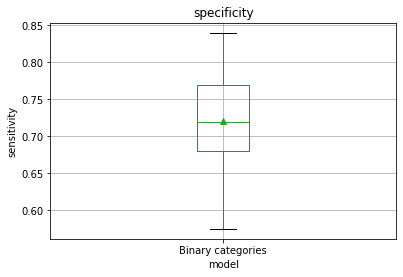

In [41]:

data_list = list()
# a = [0.74, 0.7775, 0.7225, 0.755, 0.76, 0.735, 0.7725, 0.7525, 0.7625, 0.74, 0.71, 0.7575, 0.7325, 0.7225, 0.7325, 0.755, 0.7525, 0.7425, 0.76, 0.7925, 0.7475, 0.7525, 0.755, 0.7475, 0.74, 0.7175, 0.775, 0.7775, 0.745, 0.765]
# data_list.extend([{'accuracy':data, 'model': 'Binary categories'} for data in a])
# a = [0.74, 0.7775, 0.7225, 0.755, 0.76, 0.735, 0.7725, 0.7525, 0.7625, 0.74, 0.71, 0.7575, 0.7325, 0.7225, 0.7325, 0.755, 0.7525, 0.7425, 0.76, 0.7925, 0.7475, 0.7525, 0.755, 0.7475, 0.74, 0.7175, 0.775, 0.7775, 0.745, 0.765]
data_list.extend([{'specificity':data['specificity'], 'model': 'Binary categories'} for data in train_history_list])

# sensitivity
# specificity
# b = [0.7175, 0.655, 0.6775, 0.685, 0.68, 0.69, 0.705, 0.6575, 0.68, 0.6925, 0.6525, 0.705, 0.665, 0.685, 0.705, 0.71, 0.695, 0.665, 0.71, 0.6875, 0.68, 0.6775, 0.69, 0.7125, 0.6925, 0.695, 0.685, 0.6825, 0.695, 0.695]
# data_list.extend([{'accuracy':data, 'loss_function': 'crossentropy'} for data in b])
# data_list.extend([{'specificity':data, 'result': 'big nodule'} for data in specificity_list_1])
# data_list.extend([{'specificity':data, 'result': 'small nodule'} for data in specificity_list_2])
# data_list.extend([{'specificity':data, 'result': 'non nodule'} for data in specificity_list_3])
df = pd.DataFrame(data_list)


fig,axes = plt.subplots()
df.boxplot(column='specificity',by='model',ax=axes, showfliers=True, showmeans=True)
# column引數表示要繪製成箱形圖的資料，可以是一列或多列
# by引數表示分組依據
fig.suptitle('')
axes.set_ylabel('sensitivity')

In [41]:
from sklearn.metrics import confusion_matrix
def get_sensitivity_specificity(predictions, y_test):
    y_test = np.argmax(y_test, axis=-1)
    predictions = np.argmax(predictions, axis=-1)

    c = confusion_matrix(y_test, predictions)

    return c[0, 0] / (c[0, 1] + c[0, 0]), c[1, 1] / (c[1, 1] + c[1, 0])

In [42]:
index = 3
model = train_history_list2[index].get('model')
train_history = train_history_list2[index].get('train_history')
score = model.evaluate(x_other, y_other_onehot, verbose=0)
predictions = model.predict(x_other)
sensitivity, specificity = get_sensitivity_specificity(predictions, y_other_onehot)
test_loss = score[0]
test_accuracy = score[1]
last_accuracy = train_history.history['accuracy'][-1]
last_loss = train_history.history['loss'][-1]
print('Train accuracy:', last_accuracy)
print('Train loss:', last_loss)
print('y_other Test accuracy:', test_accuracy)
print('y_other Test loss:', test_loss)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Train accuracy: 0.94921875
Train loss: 0.017299059978540754
y_other Test accuracy: 0.71083003
y_other Test loss: 0.15234931928750095
Sensitivity: 0.7018800358102059
Specificity: 0.7137798760696371


In [75]:
import tensorflow.compat.v1 as tf
from tensorflow.keras import backend as K
# import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix
from datetime import datetime

In [133]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same",
                 input_shape=(128,128,1)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))
model.add(Dense(2, activation="softmax"))

model.compile(Adam(lr=0.001),loss="categorical_crossentropy", metrics=["accuracy"])


In [134]:
train_history = model.fit(x_train,
                               y_train_onehot,
                               batch_size=100,
                               epochs=10,
                               validation_split=0.2,
                               verbose=1)


output_sensitivity_specificity(model, x_test, y_test_onehot)

Train on 640 samples, validate on 160 samples
Epoch 1/10
640/640 [==============================] - 4s 7ms/sample - loss: 1.5795 - accuracy: 0.5156 - val_loss: 0.7003 - val_accuracy: 0.5437
Epoch 2/10
640/640 [==============================] - 1s 890us/sample - loss: 0.7852 - accuracy: 0.6000 - val_loss: 0.7105 - val_accuracy: 0.5375
Epoch 3/10
640/640 [==============================] - 1s 894us/sample - loss: 0.6464 - accuracy: 0.6422 - val_loss: 1.3343 - val_accuracy: 0.5312
Epoch 4/10
640/640 [==============================] - 1s 893us/sample - loss: 0.6243 - accuracy: 0.6766 - val_loss: 3.7409 - val_accuracy: 0.5250
Epoch 5/10
640/640 [==============================] - 1s 894us/sample - loss: 0.5954 - accuracy: 0.6859 - val_loss: 5.6241 - val_accuracy: 0.5250
Epoch 6/10
640/640 [==============================] - 1s 891us/sample - loss: 0.5313 - accuracy: 0.7312 - val_loss: 7.2405 - val_accuracy: 0.5250
Epoch 7/10
640/640 [==============================] - 1s 893us/sample - loss: 0.

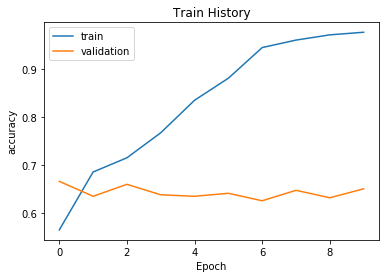

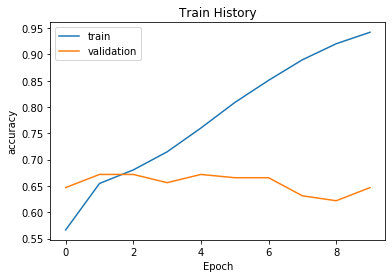

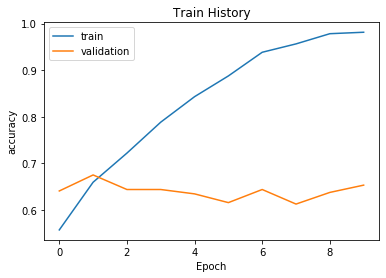

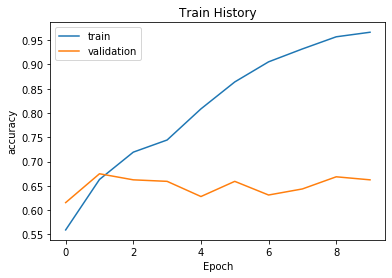

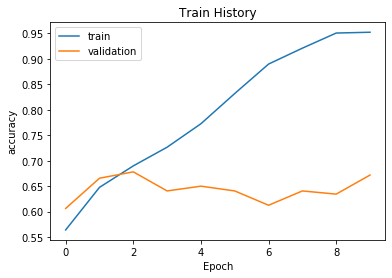

In [72]:
for train_history in train_history_list:
    show_train_history(train_history['train_history'])

In [ ]:
index = 0
conv2D_config_list = [
    {'filters': 16, 'kernel_size': (2, 2), 'input_shape': (128, 128, 1), 'strides': (2, 2)},
    {'filters': 32, 'kernel_size': (2, 2), 'input_shape': (128, 128, 1), 'strides': (2, 2)}
]
dense_config_list = [
    {'unit': 128},
    {'unit': 128}
]
train_history = cnn_model.run(index=index, batch_size=100, epochs=10, conv2D_config_list=conv2D_config_list, dense_config_list=dense_config_list)
train_history_list.append(train_history)

In [11]:
import tensorflow.compat.v1 as tf
# import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import tensorflow.keras.backend as K

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.75, allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
tf.keras.backend.set_session(sess)

In [92]:
# https://stackoverflow.com/questions/51298992/binary-classifier-keras-callback-for-sensitivity-and-specificity

def output_sensitivity_specificity(model, x_test, y_test):
    y_test = np.argmax(y_test, axis=-1)
    predictions = model.predict(x_test)
    predictions = np.argmax(predictions, axis=-1)

    c = confusion_matrix(y_test, predictions)
    print('Confusion matrix:\n', c)
    print(f'sensitivity = {c[0, 0] / (c[0, 1] + c[0, 0])}')
    print(f'specificity = {c[1, 1] / (c[1, 1] + c[1, 0])}')

In [52]:
input_shape = np.shape(x_train[0])
print(input_shape)
batch_size = 100
epochs = 10
num_classes = 2

(128, 128, 1)


In [53]:
# loss_func = SparseCategoricalFocalLoss(gamma=2)
# y_true = [0, 1, 2]
# y_pred = [[0.8, 0.1, 0.1], [0.2, 0.7, 0.1], [0.2, 0.2, 0.6]]
# loss_func(y_true, y_pred)

In [71]:
# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=16,即 output space 的深度, Kernal Size: 5x5, activation function 採用 relu
model.add(Conv2D(filters=32, 
                 kernel_size=(2, 2),
                 padding="same",
                 activation='relu',
                 input_shape=input_shape))

# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, 
                 kernel_size=(2, 2),
                 padding="same",
                 activation='relu',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model.add(Dropout(0.5))

# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model.add(Flatten())

# 全連接層: 128個output
model.add(Dense(128, activation='relu'))

# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model.add(Dropout(0.5))

# 使用 softmax activation function，將結果分類
model.add(Dense(num_classes, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
# model.compile(loss="categorical_crossentropy",
#               optimizer="adam",
#               metrics=['accuracy'])

# model.compile(loss=[SigmoidFocalCrossEntropy()], metrics=["accuracy"], optimizer="adam")
model.compile(loss=[multi_category_focal_loss2(alpha=0.25, gamma=2)], metrics=["accuracy"], optimizer="adam")

print(model.summary()) 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 128, 128, 32)      160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 32)        4128      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)              

In [79]:
# 進行訓練, 訓練過程會存在 train_history 變數中

train_history = model.fit(x_train, 
                          y_train_onehot,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_split=0.2)

# 顯示損失函數、訓練成果(分數)
score = model.evaluate(x_test, y_test_onehot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

output_sensitivity_specificity(x_test, y_test_onehot)

Train on 2348 samples, validate on 588 samples
Epoch 1/10
2348/2348 [==============================] - 1s 292us/sample - loss: 0.0098 - accuracy: 0.9672 - val_loss: 0.2436 - val_accuracy: 0.6990
Epoch 2/10
2348/2348 [==============================] - 1s 285us/sample - loss: 0.0097 - accuracy: 0.9664 - val_loss: 0.2228 - val_accuracy: 0.6939
Epoch 3/10
2348/2348 [==============================] - 1s 290us/sample - loss: 0.0091 - accuracy: 0.9702 - val_loss: 0.2165 - val_accuracy: 0.7007
Epoch 4/10
2348/2348 [==============================] - 1s 292us/sample - loss: 0.0111 - accuracy: 0.9634 - val_loss: 0.1992 - val_accuracy: 0.7007
Epoch 5/10
2348/2348 [==============================] - 1s 290us/sample - loss: 0.0105 - accuracy: 0.9681 - val_loss: 0.2150 - val_accuracy: 0.7007
Epoch 6/10
2348/2348 [==============================] - 1s 285us/sample - loss: 0.0096 - accuracy: 0.9629 - val_loss: 0.2359 - val_accuracy: 0.7143
Epoch 7/10
2348/2348 [==============================] - 1s 292us/

In [20]:
print(type(x_test))
print(np.shape(x_test))
print(type(y_test_onehot))
print(np.shape(y_test_onehot))

<class 'numpy.ndarray'>
(734, 128, 128, 1)
<class 'numpy.ndarray'>
(734, 2)


In [57]:
print(type(x_test_same_size))
print(np.shape(x_test_same_size))
print(type(y_test_onehot_same_size))
print(np.shape(y_test_onehot_same_size))

print(f'nodule count = {np.sum(y_test_same_size)}')

<class 'numpy.ndarray'>
(1318, 128, 128, 1)
<class 'numpy.ndarray'>
(1318, 2)
nodule count = 674


In [58]:
score = model.evaluate(x_test_same_size, y_test_onehot_same_size, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9626927503493469
Test accuracy: 0.60622156


In [1]:
par1={
    'Validation': 0.2, 
    'epoch': 40, 
    'Batch': 10
}
par = {
    'filter1':64,
    'filter2':128,
    'strides':1,
    'kernel': 2,
    'dropout1':0.5,
    'dropout2':0.5,
    'Neural':256
}

def DL_fun1(par,par1,x_train,y_train,x_test,y_test):
    result = None
    nf=par['filter1']
    nf1=par['filter2']
    ks=par['kernel']
    hs=np.shape(x)[1]
    ws=np.shape(x)[2]
    dr1=par['dropout1']
    dr2=par['dropout2']
    nn=par['Neural']
    vsr=par1['Validation']
    epn=par1['epoch']
    bs=par1['Batch']
    y_train_onehot = to_categorical(y_train)
    y_test_onehot = to_categorical(y_test)
    try:
        # 只使用 80% 的 GPU 記憶體config = tf.ConfigProto()
#         gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5, allow_growth=True)
#         sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
#         tf.keras.backend.set_session(sess)

        model = Sequential([
            Conv2D(filters=nf,kernel_size=(ks,ks),strides=(par['strides'],par['strides']),padding='same',input_shape=(hs,ws,1),activation='relu'),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(filters=nf1,kernel_size=(ks,ks),strides=(par['strides'],par['strides']),padding='same',input_shape=(hs,ws,1),activation='relu'),
            MaxPooling2D(pool_size=(2,2)),
            Dropout(dr1),
            Flatten(),
            Dense(nn, activation='relu'),
            Dropout(dr2),
            Dense(3,activation='softmax'),
        ])
        model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
        print(model.summary()) 
        train_history=model.fit(x=x_train,
                                y=y_train_onehot,
                                validation_split=vsr,
                                epochs=epn,
                                batch_size=bs,
                                verbose=2)
        scores=model.evaluate(x=x_test,y=y_test_onehot)
        result={'History':train_history, 'Score': scores}
        print(result)
    except Exception as e:
        print(traceback.format_exc())
    finally:
#         sess.close()
        pass
    return result

In [ ]:
result=DL_fun1(par,par1,x_train,y_train,x_test,y_test)

In [41]:
print(result)

None


In [13]:
def multi_category_focal_loss2(gamma=2., alpha=.25):
    """
    focal loss for multi category of multi label problem
    适用于多分类或多标签问题的focal loss
    alpha控制真值y_true为1/0时的权重
        1的权重为alpha, 0的权重为1-alpha
    当你的模型欠拟合，学习存在困难时，可以尝试适用本函数作为loss
    当模型过于激进(无论何时总是倾向于预测出1),尝试将alpha调小
    当模型过于惰性(无论何时总是倾向于预测出0,或是某一个固定的常数,说明没有学到有效特征)
        尝试将alpha调大,鼓励模型进行预测出1。
    Usage:
     model.compile(loss=[multi_category_focal_loss2(alpha=0.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    epsilon = 1.e-7
    gamma = float(gamma)
    alpha = tf.constant(alpha, dtype=tf.float32)

    def multi_category_focal_loss2_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
    
        alpha_t = y_true*alpha + (tf.ones_like(y_true)-y_true)*(1-alpha)
        y_t = tf.multiply(y_true, y_pred) + tf.multiply(1-y_true, 1-y_pred)
        ce = -tf.math.log(y_t)
        weight = tf.pow(tf.subtract(1., y_t), gamma)
        fl = tf.multiply(tf.multiply(weight, ce), alpha_t)
        loss = tf.reduce_mean(fl)
        return loss
    return multi_category_focal_loss2_fixed

In [ ]:
from tensorflow.python.keras.losses import LossFunctionWrapper

class SigmoidFocalCrossEntropy(LossFunctionWrapper):
    """Implements the focal loss function.
    Focal loss was first introduced in the RetinaNet paper
    (https://arxiv.org/pdf/1708.02002.pdf). Focal loss is extremely useful for
    classification when you have highly imbalanced classes. It down-weights
    well-classified examples and focuses on hard examples. The loss value is
    much high for a sample which is misclassified by the classifier as compared
    to the loss value corresponding to a well-classified example. One of the
    best use-cases of focal loss is its usage in object detection where the
    imbalance between the background class and other classes is extremely high.
    Usage:
    ```python
    fl = tfa.losses.SigmoidFocalCrossEntropy()
    loss = fl(
      [[0.97], [0.91], [0.03]],
      [[1.0], [1.0], [0.0]])
    print('Loss: ', loss.numpy())  # Loss: [0.00010971,
                                            0.0032975,
                                            0.00030611]
    ```
    Usage with tf.keras API:
    ```python
    model = tf.keras.Model(inputs, outputs)
    model.compile('sgd', loss=tf.keras.losses.SigmoidFocalCrossEntropy())
    ```
    Args
      alpha: balancing factor, default value is 0.25
      gamma: modulating factor, default value is 2.0
    Returns:
      Weighted loss float `Tensor`. If `reduction` is `NONE`, this has the same
          shape as `y_true`; otherwise, it is scalar.
    Raises:
        ValueError: If the shape of `sample_weight` is invalid or value of
          `gamma` is less than zero
    """

    def __init__(
        self,
        from_logits=False,
        alpha=0.25,
        gamma=2.0,
        reduction: str = tf.losses.Reduction.NONE,
        name: str = "sigmoid_focal_crossentropy",
    ):
        super().__init__(
            sigmoid_focal_crossentropy,
            name=name,
            reduction=reduction,
            from_logits=from_logits,
            alpha=alpha,
            gamma=gamma,
        )

def sigmoid_focal_crossentropy(
    y_true,
    y_pred,
    alpha=0.25,
    gamma=2.0,
    from_logits: bool = False,
):
    """
    Args
        y_true: true targets tensor.
        y_pred: predictions tensor.
        alpha: balancing factor.
        gamma: modulating factor.
    Returns:
        Weighted loss float `Tensor`. If `reduction` is `NONE`,this has the
        same shape as `y_true`; otherwise, it is scalar.
    """
    if gamma and gamma < 0:
        raise ValueError("Value of gamma should be greater than or equal to zero")

    y_pred = tf.convert_to_tensor(y_pred)
    y_true = tf.convert_to_tensor(y_true, dtype=y_pred.dtype)

    # Get the cross_entropy for each entry
    ce = K.binary_crossentropy(y_true, y_pred, from_logits=from_logits)

    # If logits are provided then convert the predictions into probabilities
    if from_logits:
        pred_prob = tf.sigmoid(y_pred)
    else:
        pred_prob = y_pred

    p_t = (y_true * pred_prob) + ((1 - y_true) * (1 - pred_prob))
    alpha_factor = 1.0
    modulating_factor = 1.0

    if alpha:
        alpha = tf.convert_to_tensor(alpha, dtype=K.floatx())
        alpha_factor = y_true * alpha + (1 - y_true) * (1 - alpha)

    if gamma:
        gamma = tf.convert_to_tensor(gamma, dtype=K.floatx())
        modulating_factor = tf.pow((1.0 - p_t), gamma)

    # compute the final loss and return
    return tf.reduce_sum(alpha_factor * modulating_factor * ce, axis=-1)

In [33]:
fl = SigmoidFocalCrossEntropy()
loss = fl(
  y_true = [[1.0], [1.0], [0.0]],
  y_pred = [[0.97], [0.91], [0.03]])
print('Loss: ', loss.numpy())  # Loss: [6.8532745e-06,
#                                         1.9097870e-04,
#                                         2.0559824e-05]

Loss:  [6.8532740e-06 1.9097868e-04 2.0559823e-05]


In [8]:
# from skimage.segmentation import clear_border
# from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
# from skimage.measure import label,regionprops, perimeter
# from skimage.morphology import binary_dilation, binary_opening
# from skimage.filters import roberts, sobel
# from scipy import ndimage as ndi
# import matplotlib.pyplot as plt

# def get_binary_image(im, do_plot=False):
#     im = label0_dicom_list[-100].pixel_array
#     '''
#     Step 1: Convert into a binary image.
#     '''
#     binary = im < 604
#     '''
#     Step 2: Remove the blobs connected to the border of the image.
#     '''
#     cleared = clear_border(binary)
#     '''
#     Step 3: Label the image.
#     '''
#     label_image = label(cleared)
#     '''
#     Step 4: Keep the labels with 2 largest areas.
#     '''
#     areas = [r.area for r in regionprops(label_image)]
#     areas.sort()
#     if len(areas) > 2:
#         for region in regionprops(label_image):
#             if region.area < areas[-2]:
#                 for coordinates in region.coords:
#                     label_image[coordinates[0], coordinates[1]] = 0

#     binary = label_image > 0  
#     '''
#     Step 5: Erosion operation with a disk of radius 2. This operation is
#     seperate the lung nodules attached to the blood vessels.
#     '''
#     selem = disk(2)
#     binary = binary_erosion(binary, selem)
#     '''
#     Step 6: Closure operation with a disk of radius 10. This operation is
#     to keep nodules attached to the lung wall.
#     '''
#     selem = disk(10)
#     binary = binary_closing(binary, selem)
#     '''
#     Step 7: Fill in the small holes inside the binary mask of lungs.
#     '''
#     edges = roberts(binary)
#     binary = ndi.binary_fill_holes(edges)
#     '''
#     Step 8: Superimpose the binary mask on the input image.
#     '''
#     get_high_vals = binary == 0
#     im[get_high_vals] = 0

#     if do_plot:
#         plt.imshow(im, cmap=plt.cm.gray)

#     return im

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

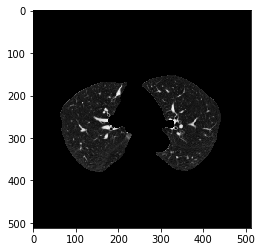

In [9]:
# get_binary_image(label0_dicom_list[0].pixel_array, True)